<a href="https://colab.research.google.com/github/georgekar/short-term-load-forecasting/blob/main/Timeseries_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Timeseries Analysis
Timeseries analysis comprises methods for analyzing time series data in order to extract meaningful statistics and other characteristics of the data. The main goal is to identify the effect of one variable on either itself or another over time, in order to get insights regarding the nature of a problem or/and create predictive models.

For the statistical processing of timeseries it is particularly useful to distinguish its four components:
* **Trend**: The long-term movement, upwards or downwards, of a timeseries when observed over an extended period of time, could be defined as trend. The trend does not exist when its movement is parallel to the axis of time, without fluctuations. The most common methods of determining trend are moving average and least squares.
* **Seasonality**: A timeseries exhibits seasonality when its dispersion exhibits the same behavior over time periods t. Usually periodic fluctuations refer to time intervals shorter than a year. An example of seasonality is the increase on energy consumption during the winter.
* **Cyclicity**: Cyclicity expresses the cyclical fluctuations for periods longer than a year that are repeated at equal time intervals and are due to external factors.
* **Irregular Fluctuations / Outliers**: They are values that are significantly different from the rest of the observations, where they are usually due to some unpredictable factor and create problems in modeling.

# Exploratory Data Analysis (EDA)
Exploratory Data Analysis refers to the critical process of performing an initial investigation on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations. Data visualization is one of the steps of the data science process, which states that after data has been collected, processed and modeled, it must be visualized for conclusions to be made.Visualization is an increasingly key tool to make sense of the trillions of rows of data generated every day. On top it is useful for data cleaning, exploring data structure, detecting outliers and unusual groups, identifying trends and clusters, spotting local patterns, evaluating modeling output, and presenting results. It is essential for exploratory data analysis and data mining to check data quality and to help analysts become familiar with the structure and features of the data before them. Data visualization helps to tell stories by curating data into a form easier to understand, highlighting the trends and outliers.

First let's take a look on our data, house3.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

warnings.simplefilter('ignore', category=UserWarning)
warnings.simplefilter('ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Thesis/house3.csv', parse_dates=['timestamp'], index_col='timestamp',
                 usecols=['timestamp', 'IMPORT_KW', 'YEAR', 'MONTH', 'DAY', 'HOUR_OF_DAY', 'DD', 'FH', 'FF', 'FX', 'T', 'TD',
                          'SQ',	'Q',	'DR',	'RH',	'U',	'IX',	'HOLIDAY'])
df.head()

,IMPORT_KW,YEAR,MONTH,DAY,HOUR_OF_DAY,DD,FH,FF,FX,T,TD,SQ,Q,DR,RH,U,IX,HOLIDAY
timestamp,,,,,,,,,,,,,,,,,,
2018-08-01 00:00:00,12.24,2018,8,1,0,0,0,0,10,145,131,0,0,0,0,91,6,0
2018-08-01 01:00:00,9.36,2018,8,1,1,100,0,10,10,125,122,0,0,0,0,97,6,0
2018-08-01 02:00:00,12.06,2018,8,1,2,0,0,0,10,127,125,0,0,0,0,98,6,0
2018-08-01 03:00:00,11.64,2018,8,1,3,0,0,0,10,124,123,0,0,0,0,99,6,0
2018-08-01 04:00:00,11.76,2018,8,1,4,230,0,10,20,116,112,0,0,0,0,97,6,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18286 entries, 2018-08-01 00:00:00 to 2020-08-31 21:00:00
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IMPORT_KW    18286 non-null  float64
 1   YEAR         18286 non-null  int64  
 2   MONTH        18286 non-null  int64  
 3   DAY          18286 non-null  int64  
 4   HOUR_OF_DAY  18286 non-null  int64  
 5   DD           18286 non-null  int64  
 6   FH           18286 non-null  int64  
 7   FF           18286 non-null  int64  
 8   FX           18286 non-null  int64  
 9   T            18286 non-null  int64  
 10  TD           18286 non-null  int64  
 11  SQ           18286 non-null  int64  
 12  Q            18286 non-null  int64  
 13  DR           18286 non-null  int64  
 14  RH           18286 non-null  int64  
 15  U            18286 non-null  int64  
 16  IX           18286 non-null  int64  
 17  HOLIDAY      18286 non-null  int64  
dtypes: float64(

In [5]:
df.describe()

,IMPORT_KW,YEAR,MONTH,DAY,HOUR_OF_DAY,DD,FH,FF,FX,T,TD,SQ,Q,DR,RH,U,IX,HOLIDAY
count,18286.000000,18286.000000,18286.000000,18286.000000,18286.000000,18286.000000,18286.000000,18286.000000,18286.000000,18286.000000,18286.000000,18286.000000,18286.000000,18286.000000,18286.000000,18286.000000,18286.0,18286.000000
mean,8.232439,2019.119326,6.579897,15.747676,11.498797,196.761457,30.132342,30.261949,59.785628,112.603030,75.164826,2.262715,46.541343,0.651482,0.755223,79.625123,6.0,0.307120
std,4.622721,0.711852,3.391530,8.809104,6.921796,134.717037,18.506855,18.951812,33.944219,68.525315,55.123949,3.680945,73.909376,2.146047,4.335331,16.511974,0.0,0.461312
min,0.060000,2018.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-84.000000,-91.000000,0.000000,0.000000,0.000000,-1.000000,18.000000,6.0,0.000000
25%,5.700000,2019.000000,4.000000,8.000000,5.250000,110.000000,20.000000,20.000000,30.000000,62.000000,32.000000,0.000000,0.000000,0.000000,0.000000,69.000000,6.0,0.000000
50%,7.920000,2019.000000,7.000000,16.000000,11.000000,210.000000,30.000000,30.000000,50.000000,106.000000,74.000000,0.000000,2.000000,0.000000,0.000000,84.000000,6.0,0.000000
75%,9.772830,2020.000000,9.000000,23.000000,17.000000,250.000000,40.000000,40.000000,80.000000,161.000000,119.000000,4.000000,69.000000,0.000000,0.000000,93.000000,6.0,1.000000
max,24.300000,2020.000000,12.000000,31.000000,23.000000,990.000000,130.000000,140.000000,270.000000,387.000000,241.000000,10.000000,329.000000,10.000000,150.000000,100.000000,6.0,1.000000


At the first glance there isn’t an extreme deviation between mean and median values of IMPORT_KW. There are no missing values. When checking the stats at the bottom we noticed that IX weather feature is a constant with value 6. It does not bring any value to consider it, so we dropped it.

In [6]:
df.drop(columns=['IX'], inplace=True)

Data distribution is an important aspect to consider when modeling the data that will be fed in a model.

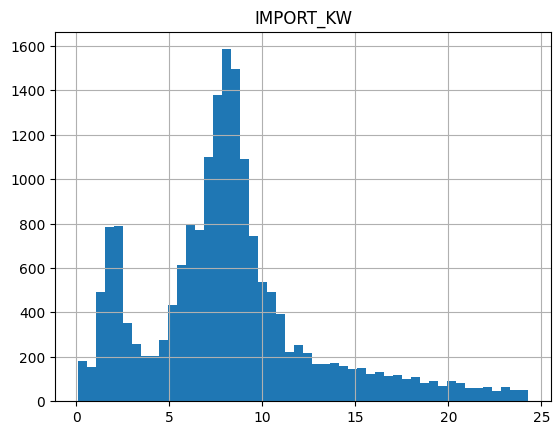

In [7]:
df.hist(bins=50, column='IMPORT_KW')
plt.show()

Next we will turn time features to cyclical so that day 31 of month 1 is close to day 1 of month 2. We will run the cosine function after normalizing x between 0 to 2π, which corresponds to one cosine cycle. However, there two different times would get the same value due to the cyclical nature of the cosine. Therefore, we will acompany cosine with sine. This other cyclical information would help us to distinguish two times with identical cosine values. We could think of it as a two-axis coordinates system.

In [10]:
hours_in_day = 24
df['hour_sin'] = np.sin(2 * np.pi * df.HOUR_OF_DAY / hours_in_day)
df['hour_cos'] = np.cos(2 * np.pi * df.HOUR_OF_DAY / hours_in_day)

days_in_month = 30
df["day_sin"] = np.sin(2 * np.pi * df.DAY / days_in_month)
df["day_cos"] = np.cos(2 * np.pi * df.DAY / days_in_month)

month_in_year = 12
df["month_sin"] = np.sin(2 * np.pi * df.MONTH / month_in_year)
df["month_cos"] = np.cos(2 * np.pi * df.MONTH / month_in_year)

Next step is to check the correlation of the features within our dataset. We notice that the cyclical cos and sin features are more correlated from the respective time features hence we are going to use those instead. U, DR have a strong positive correlation with IMPORT_KW, while on the other hand T, TD, SQ, SQ, Q have a strong negative correlation. The rest of the feature do not seem to affect IMPORT_KW that much; hence we won’t use them in our model.

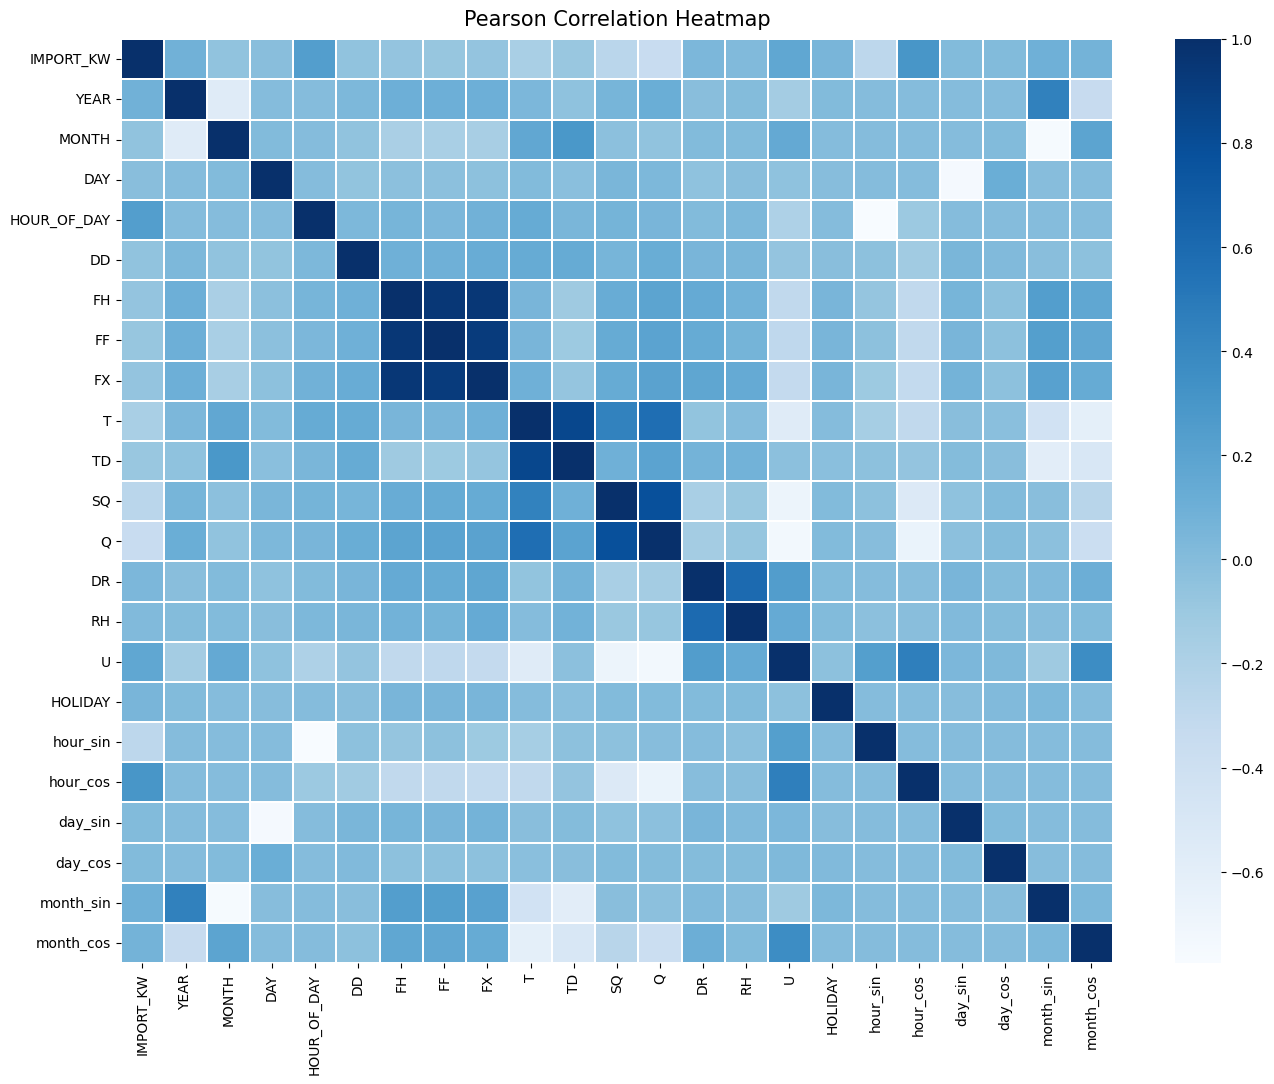

In [12]:
fig, ax = plt.subplots(figsize=(16, 12), facecolor='w')
correlations_df = df.corr(method='pearson', min_periods=1)
sns.heatmap(correlations_df, cmap="Blues", linewidth=.1)
ax.set_title("Pearson Correlation Heatmap", fontsize=15, pad=10)
ax.set_facecolor(color='white')
plt.show()

Plotting the timeseries help unveiling temporal pattern. Let’s take a look on house3 data. It is clear that there is a seasonal pattern. Consumption is higher during winter and lower during summer. October 2019 shows a sudden low consumption. If this is not a pattern also in the future it might bring a challenge forecasting October.

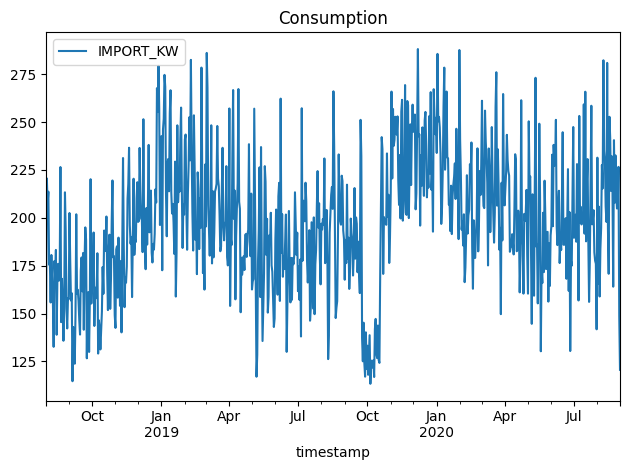

In [13]:
house_df = df.resample('D').sum()
house_df.reset_index(inplace=True)
house_df.plot.line(x='timestamp', y=['IMPORT_KW'], title='Consumption')
plt.legend()
plt.tight_layout()
plt.show()

At the beginning, we talked about timeseries components, decomposing a timeseries helps interpreting those. We notice that the trend is following a seasonal pattern, increasing during winter, and decreasing during summer. The seasonal component also shows a pattern but we need to zoom in a bit in order to identify yearly, monthly, daily patterns. Residuals look quite steady throughout.

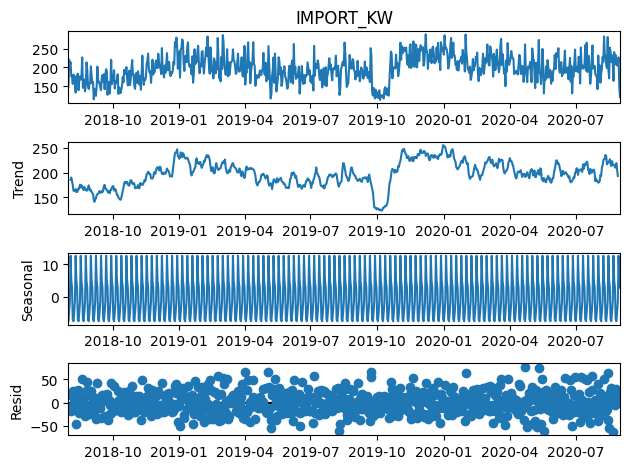

In [14]:
decompose_df = df.resample('D').sum()
decomposition = seasonal_decompose(decompose_df['IMPORT_KW'])
decomposition.plot()
plt.tight_layout()
plt.show()

Next, we will examine the distribution of energy consumption using different internals. Boxplots are ideal for this. Boxplots are a standardized way of displaying the distribution of data based on a five number summary: minimum, first quartile Q1, median, third quartile Q3, and maximum.
* **Median** (Q2/50th percentile): The middle value of the data set.
* **First Quartile** (Q1/25th percentile): The median value between the smallest number of the dataset and the median of the data set.
* **Third Quartile** (Q3/75th percentile): The median value between the median and the highest number of the dataset.
* **Interquartile Range** (IQR): 25th to the 75th percentile.
* **maximum**: 𝑄3 + 1.5 ∗ 𝐼𝑄𝑅.
* **minimum**: 𝑄1 − 1.5 ∗ 𝐼𝑄𝑅.
* **Whiskers**: The lines which connect the minimum to Q1 and Q3 to maximum.
* **Outliers**: Values that are outside minimum or maximum.

In [15]:
def box_plot_seasonality(df: pd.DataFrame, interval: str) -> None:
    if interval == 'month':
        df['month'] = df.index.month
    elif interval == 'week':
        df['week'] = df.index.day_of_week + 1
    else:
        df['hour'] = df.index.hour + 1

    fig, ax = plt.subplots(figsize=(7, 3.5))
    df.boxplot(column='IMPORT_KW', by=interval, ax=ax, )
    df.groupby(interval)['IMPORT_KW'].median().plot(style='o-', linewidth=0.8, ax=ax)
    ax.set_ylabel('Consumption')
    ax.set_title('Consumption distribution by {}'.format(interval))
    fig.suptitle('')
    plt.show()

Figure below depicts consumption distribution by month. The boxplot below cancels our assumption that there is a yearly pattern for this house. We see that winter months have more or less the same median values as summer ones. Low consumption occurs in May, September, and October. We also notice the presence of outliers. This plot backs up the correlation matrix Figure 27, indicating that YEAR and MONTH could be excluded as features since they do not have a considerable effect on consumption.

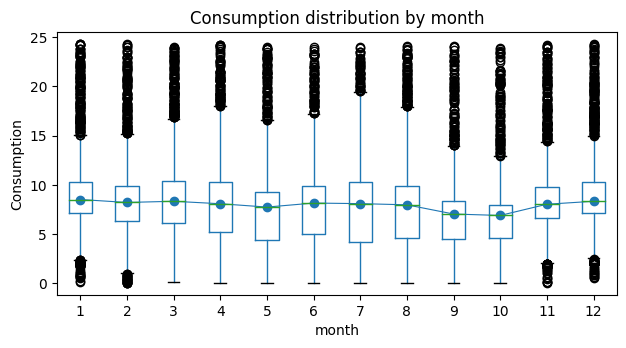

In [16]:
box_plot_seasonality(df, 'month')

Next figure presents consumption distribution by week. House 3 does not show any clear weekly pattern. Outliers are present here as well. Hence, excluding feature DAY, was a decision in the right direction.

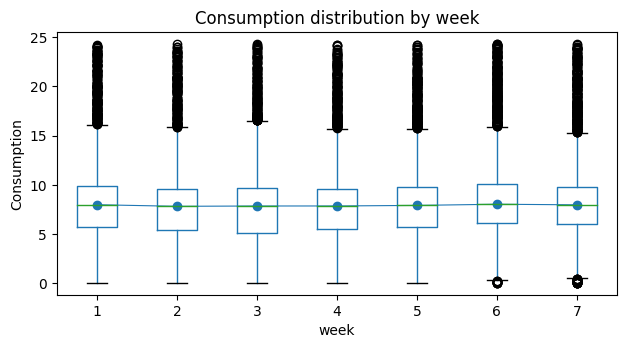

In [17]:
box_plot_seasonality(df, 'week')

It is also interesting to examine consumption distribution by hour. Demand is relatively stable during the night. In the morning and noon, there is a drop in consumption. Assuming that heating demands during the day are less and that people are working, this pattern seems logical. From 5pm to 11pm the consumption increases. People are returning home and use the house in full capacity; heating, lighting, cooking, charging devices, charging a car, etc. It is obvious that HOUR_OF_DAY is an important feature since it affects much the consumption.

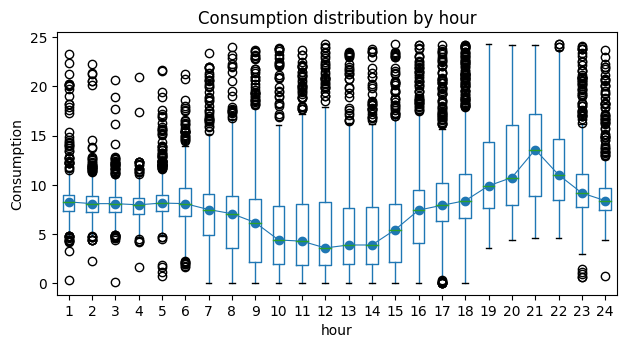

In [18]:
box_plot_seasonality(df, 'hour')

Another interesting aspect to investigate is how consumption behaves between holidays and non-holidays. In our case, holidays do not have an effect on consumption; hence HOLIDAYS feature can be dropped.

In [19]:
def consumption_on_holidays(df: pd.DataFrame) -> None:
    df = df.assign(HOLIDAY=df.HOLIDAY.astype(str))
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.5))
    sns.violinplot(
        x='IMPORT_KW',
        y='HOLIDAY',
        data=df,
        palette='tab10',
        ax=ax
    )
    ax.set_title('Distribution of consumption between holidays and non-holidays')
    ax.set_xlabel('Demand')
    ax.set_ylabel('Holiday')
    plt.show()

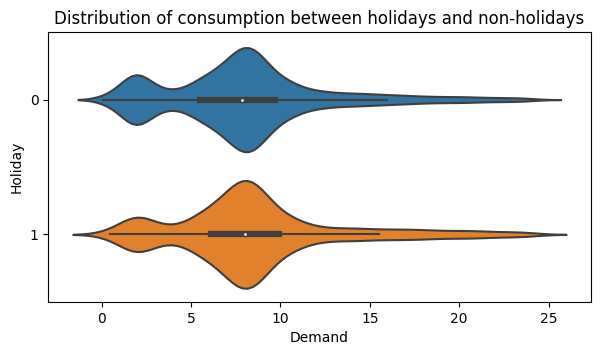

In [20]:
consumption_on_holidays(df)

# Stationary analysis
A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time. Most statistical forecasting methods assume that the time series can be rendered approximately stationary using mathematical transformations. A stationarised series is relatively easy to predict; its statistical properties will be the same in the future as they have been in the past. Another reason for trying to make the time series stationary is to be able to obtain meaningful sample statistics such as means, variances, and correlations with other variables. Such statistics are useful as descriptors of future behavior only if the series is stationary. For example, if the series is consistently increasing over time, the sample mean and variance will grow with the size of the sample, and they will always underestimate the mean and variance in future periods. And if the mean and variance of a series are not well-defined, then neither are its correlations with other variables.

In [21]:
def plot_rolling_mean_and_std(dataframe: pd.DataFrame, window: int) -> None:
    """
    This function plots the dataframes
    rolling mean and rolling standard deviation.
    ---
    Args:
        dataframe (pd.DataFrame): Dataframe contains the timeseries
        window (int): window size
    Returns: None
    """
    df = dataframe.copy()
    df = df.resample('D').sum()
    # Get Things Rolling
    roll_mean = df.rolling(window=window).mean()
    roll_std = df.rolling(window=window).std()

    # Figure
    fig, ax = plt.subplots(figsize=(16, 9), facecolor='w')
    ax.plot(df, label='Original')
    ax.plot(roll_mean, label='Rolling Mean')
    ax.plot(roll_std, label='Rolling STD')

    # Legend & Grid
    ax.legend(loc='upper right')
    ax.set_title('Stationary check using rolling mean and std')
    plt.grid(linestyle=":", color='grey')
    plt.show()

Fluctuating rolling mean and standard deviation can be a first indication of non-stationary time series. Judging from figure below the series does not look stationary, since the mean and the variance of timeseries are not constant over time.

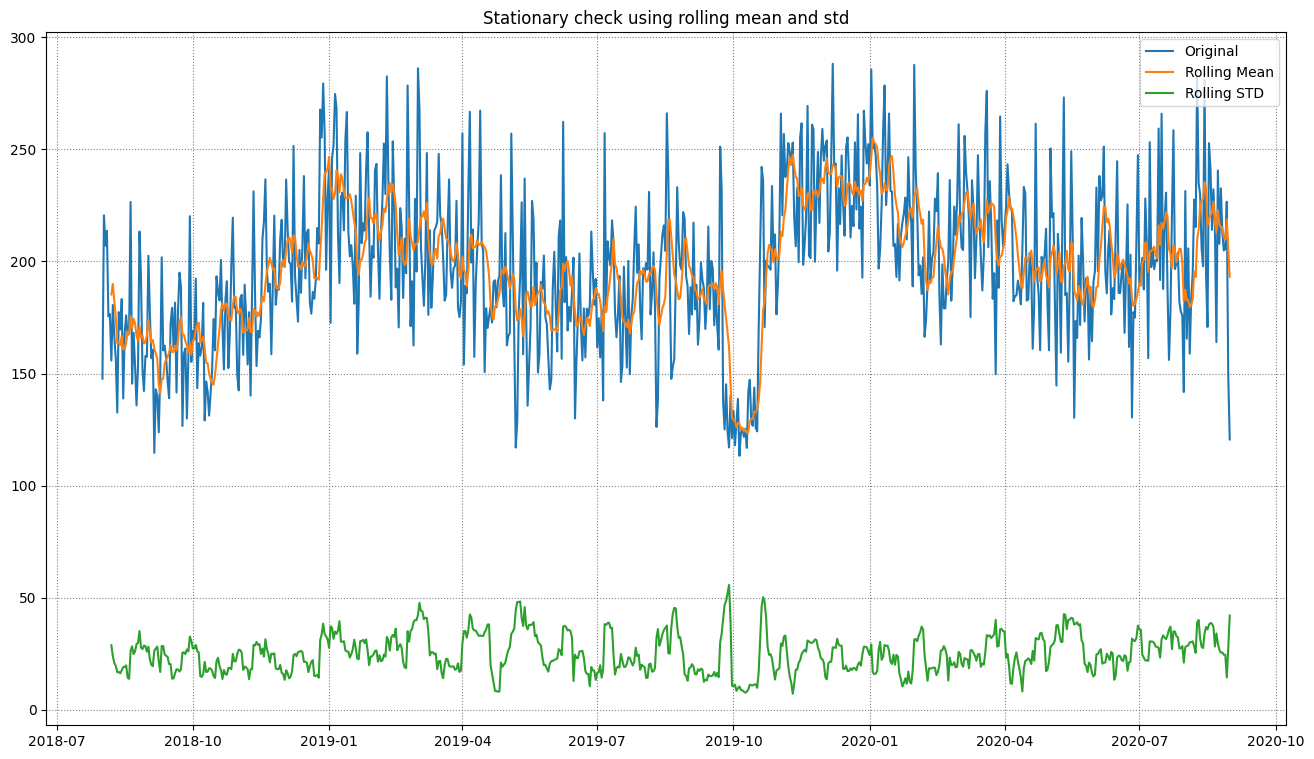

In [22]:
plot_rolling_mean_and_std(df['IMPORT_KW'], window=7)

In [23]:
def perform_adf_kpss_check(df: pd.DataFrame, max_d: int) -> pd.DataFrame:
    """ Build dataframe with ADF statistics and p-value for time series after applying difference on time series

    Args:
        df (df): Dataframe of univariate time series
        max_d (int): Max value of how many times apply difference

    Return:
        Dataframe showing values of ADF statistics and p when applying ADF test after applying d times
        differencing on a time-series.

    """

    results = []

    for idx in range(max_d):
        adf_result = adfuller(df, autolag='AIC')
        kpss_result = kpss(df, regression='c', nlags="auto")
        df = df.diff().dropna()
        if adf_result[1] <= 0.05:
            adf_stationary = True
        else:
            adf_stationary = False
        if kpss_result[1] <= 0.05:
            kpss_stationary = False
        else:
            kpss_stationary = True

        stationary = adf_stationary & kpss_stationary

        results.append((idx, adf_result[1], kpss_result[1], adf_stationary, kpss_stationary, stationary))

    # Construct DataFrame
    results_df = pd.DataFrame(results, columns=['d', 'adf_stats', 'p-value', 'is_adf_stationary', 'is_kpss_stationary',
                                                'is_stationary'])

    return results_df

With this in mind lets perform two statistical tests to discover if series have unit root, Augmented Dickey-Fuller (ADF), or if it is trend stationary, Kwiatkowski–Phillips–Schmidt–Shin (KPSS).

**ADF test**:
* The null hypothesis for this test is that there is a unit root.
* The alternate hypothesis is that there is no unit root in the series

**KPSS test**:
* The null hypothesis for the test is that the data is stationary.
* The alternate hypothesis for the test is that the data is not stationary.

If we fail to reject the null hypothesis, we can say that the series is non-stationary. If both mean and standard deviation are flat lines (constant mean and constant variance), the series becomes stationary.
Figure, shows the results of both tests, applying differencing only once is enough to make our time series is stationary.

In [24]:
perform_adf_kpss_check(df['IMPORT_KW'], 3).head()

,d,adf_stats,p-value,is_adf_stationary,is_kpss_stationary,is_stationary
0,0,8.416788e-24,0.01,True,False,False
1,1,0.000000e+00,0.10,True,True,True
2,2,0.000000e+00,0.10,True,True,True


# Autocorrelation and partial autocorrelation analysis
Autocorrelation Function (ACF) is a statistical correlation, which summarizes the strength of the relationship between two variables. Pearson’s correlation coefficient is a number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation. We can calculate the correlation for time series observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation. A plot of the autocorrelation of a time series by lag is called the Autocorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.

Partial Autocorrelation Function (PACF) is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed. The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags. The autocorrelation for observation and observation at a prior time step is comprised of both the direct correlation and indirect correlations. It is these indirect correlations that the partial autocorrelation function seeks to remove.

The autocorrelation and partial autocorrelation plots show a clear association between one hour's consumption and previous hours, as well as between one hour's consumption and the same hour's consumption on previous days. This type of correlation is an indication that autoregressive models can work well.

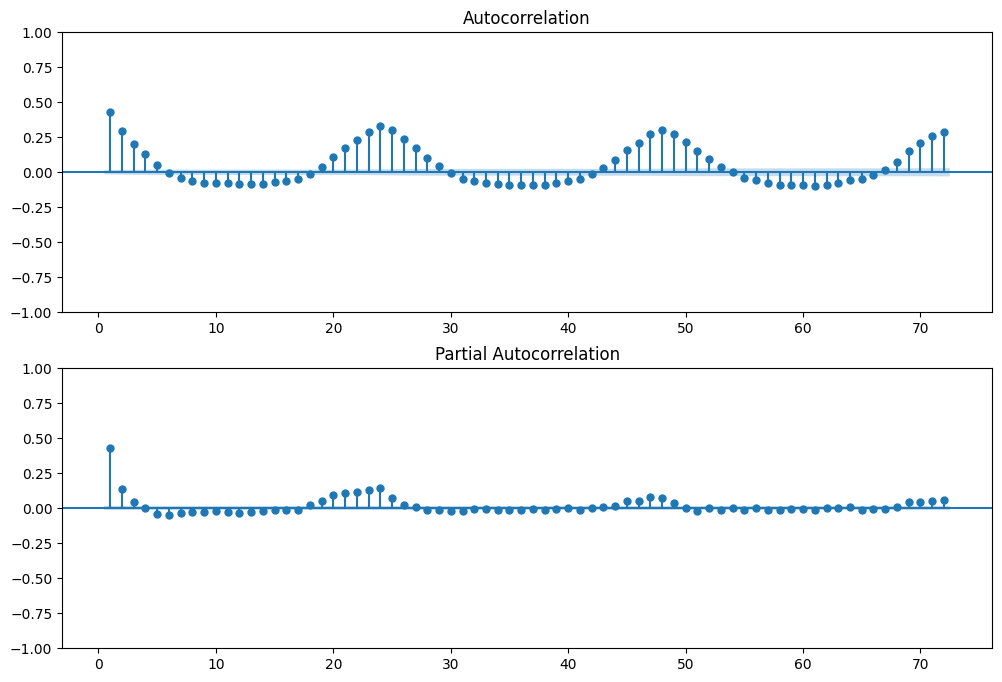

In [25]:
consumption = df['IMPORT_KW']
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(consumption, lags=72, zero=False, ax=ax1)
plot_pacf(consumption, lags=72, zero=False, ax=ax2)
plt.show()

As we already knew our series are seasonal and our ACF plot confirms this pattern. First significant lag is lag 1. The energy consumption raises/decreases, depends on the hour of day, gradually from hour to hour. Hence the energy value during the previous hour might tell us something about energy during the current hour. Next important lag is 24. 24-hour lag shows that energy consumption today at 4pm might hint about energy consumption tomorrow at 4pm. With PACF we can see that lags 1 and 24 have the highest correlation. This means that seasons 24 hours apart are directly correlated regardless of what is happening in between.